<a href="https://colab.research.google.com/github/Jacksonc2630/GC_ConfusionMatrixF/blob/main/confusion_matrix_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [ ]:
import pandas as pd
df = pd.read_csv("BankNote_Authentication.csv")
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
from sklearn.model_selection import train_test_split

Variance = df["variance"]
Class = df["class"]
Variance_train, Variance_test, Class_train, Class_test = train_test_split(Variance, Class, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(Variance_train.ravel(), (len(Variance_train), 1))
Y = np.reshape(Class_train.ravel(), (len(Class_train), 1))
classifer = LogisticRegression(random_state = 0)
classifer.fit(X,Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(Variance_train.ravel(), (len(Variance_train), 1))
Y = np.reshape(Class_train.ravel(), (len(Class_train), 1))
classifer = LogisticRegression(random_state = 0)
classifer.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
X_test = np.reshape(Variance_test.ravel(), (len(Variance_test), 1))
Y_test = np.reshape(Class_test.ravel(), (len(Class_test), 1))
Class_prediction = classifer.predict(X_test)
predicted_values = []
for i in Class_prediction:
  if i == 0:
    predicted_values.append("no")
  else:
    predicted_values.append("yes")

acutal_values = []
for i in Y_test.ravel():
  if i == 0:
    acutal_values.append("no")
  else:
    acutal_values.append("yes")

[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

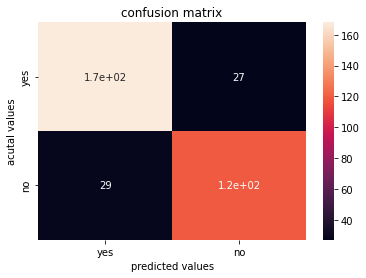

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
label = ["yes", "no"]
cm = confusion_matrix(acutal_values, predicted_values)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('predicted values')
ax.set_ylabel('acutal values')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(label)
ax.yaxis.set_ticklabels(label)

In [ ]:
accuracy = (36 + 16) / (36 + 16 + 17 + 7)
print(accuracy)

0.6842105263157895


In [ ]:
factors = df[["variance"]]
Class = df["class"]

factors_train, factors_test, Class_train, Class_test = train_test_split(factors, Class, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.transform(factors_test)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(factors_train, Class_train)

LogisticRegression(random_state=0)

In [ ]:
Class_prediction_1 = classifier2.predict(factors_test)

predicted_values_1 = []
for i in Class_prediction_1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")

actual_values_1 = []
for i in Class_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")

[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

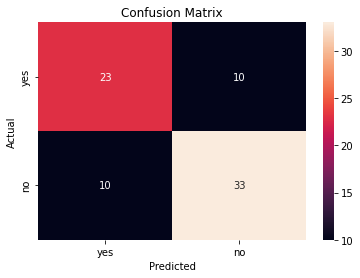

In [ ]:
cm = confusion_matrix(actual_values_1, predicted_values_1)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label); ax.yaxis.set_ticklabels(label)

In [ ]:
accuracy = (33 + 23) / (33 + 23 + 10 + 10)
print(accuracy)

0.7368421052631579
